In [98]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [99]:
vacancies_2020 = pd.read_csv('data/vacancies_2020.csv')
vacancies_2024 = pd.read_csv('data/vacancies_2024.csv')

vacancies_2020_saved = vacancies_2020.copy()
vacancies_2024_saved = vacancies_2024.copy()

In [100]:
vacancies_2020 = vacancies_2020_saved.copy()
vacancies_2024 = vacancies_2024_saved.copy()

2020-09-17 10:07:38+03:00
2020-10-17 14:32:06+03:00
2024-02-02 06:09:57+03:00
2024-03-02 19:49:32+03:00


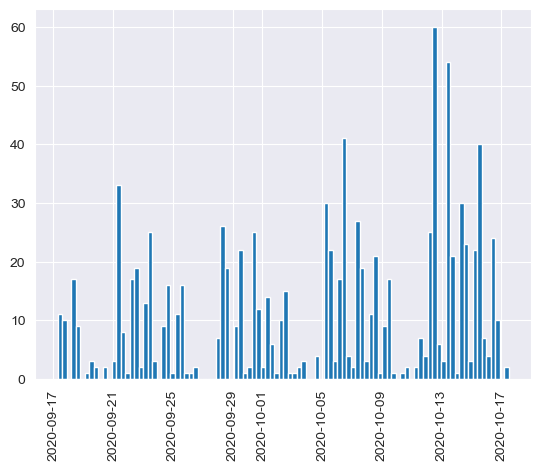

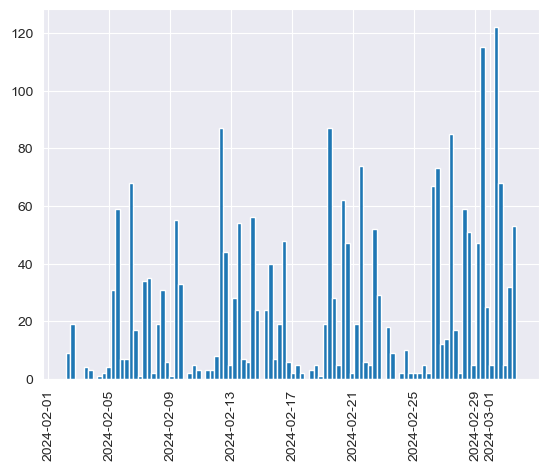

In [101]:
import re

words_to_match = ['Data scientist', 'Data analyst', 'ML', 'AI', 'Machine Learning', 'Artificial Intelligence',
                  'Аналитик данных', 'Data Engineer', 'Инженер данных', 'Reinforcement learning',
                  'Аналитик-исследователь', 'Нейросеть', 'Искусственный интеллект', 'Машинное обучение']

pattern = '|'.join(rf'\b{re.escape(word)}\b' for word in words_to_match)

vacancies_2020 = vacancies_2020[vacancies_2020['name'].str.contains(pattern, case=False, regex=True)]

# drop archived vacancies
vacancies_2020 = vacancies_2020[vacancies_2020['archived'] == False]
vacancies_2024 = vacancies_2024[vacancies_2024['archived'] == False]

# plot the distribution of published_at
import matplotlib.pyplot as plt

# use x as the date and y as the count of vacancies
vacancies_2020['published_at'] = pd.to_datetime(vacancies_2020['published_at'])
vacancies_2024['published_at'] = pd.to_datetime(vacancies_2024['published_at'])

vacancies_2020 = vacancies_2020['2020-09-17' < vacancies_2020['published_at']]
vacancies_2020 = vacancies_2020[vacancies_2020['published_at'] < '2020-10-18']

# minimum and maximum published_at
print(vacancies_2020['published_at'].min())
print(vacancies_2020['published_at'].max())
print(vacancies_2024['published_at'].min())
print(vacancies_2024['published_at'].max())

vacancies_2020['published_at'].hist(bins=100)
# rotate x-axis labels
plt.xticks(rotation=90)
plt.show()

vacancies_2024['published_at'].hist(bins=100)
# rotate x-axis labels
plt.xticks(rotation=90)
plt.show()

In [102]:
vacancies_2020.head(3)

,id,description,key_skills,schedule_id,schedule_name,accept_handicapped,accept_kids,experience_id,experience_name,specializations,...,address_lng,alternate_url,apply_alternate_url,code,department_id,department_name,employment_id,employment_name,prof_classes_found,terms_found
2387,39340749,<p>Уже более восьми лет мы погружаемся в тему ...,Python\nAgile Project Management\nРазработка т...,fullDay,Полный день,False,False,moreThan6,Более 6 лет,"1.221 Программирование, Разработка 1 Информаци...",...,60.493872,https://hh.ru/vacancy/39340749,https://hh.ru/applicant/vacancy_response?vacan...,NaN,NaN,NaN,full,Полная занятость,data_scientist teamlead,машинное_обучение team macbook наставник qa pa...
2388,39340769,<p>Уже более восьми лет мы погружаемся в тему ...,Python\nAgile Project Management\nРазработка т...,fullDay,Полный день,False,False,moreThan6,Более 6 лет,"1.221 Программирование, Разработка 1 Информаци...",...,NaN,https://hh.ru/vacancy/39340769,https://hh.ru/applicant/vacancy_response?vacan...,NaN,NaN,NaN,full,Полная занятость,data_scientist teamlead,машинное_обучение team macbook наставник qa pa...
2392,39340785,<p>Уже более восьми лет мы погружаемся в тему ...,Python\nAgile Project Management\nРазработка т...,fullDay,Полный день,False,False,moreThan6,Более 6 лет,"1.221 Программирование, Разработка 1 Информаци...",...,NaN,https://hh.ru/vacancy/39340785,https://hh.ru/applicant/vacancy_response?vacan...,NaN,NaN,NaN,full,Полная занятость,data_scientist teamlead,машинное_обучение team macbook наставник qa pa...


In [103]:
vacancies_2024.head(3)

,Unnamed: 0,id,premium,name,department,has_test,response_letter_required,area,salary,type,...,working_time_modes,accept_temporary,professional_roles,accept_incomplete_resumes,experience,employment,adv_response_url,is_adv_vacancy,adv_context,show_logo_in_search
0,0,93953781,False,Junior Data Scientist,NaN,False,False,"{'id': '74', 'name': 'Польша', 'url': 'https:/...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN
1,1,93953782,False,Junior Data Scientist,NaN,False,False,"{'id': '146', 'name': 'Сербия', 'url': 'https:...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN
2,2,92770845,False,Junior Data Engineer,NaN,False,False,"{'id': '13', 'name': 'Армения', 'url': 'https:...","{'from': None, 'to': 900, 'currency': 'EUR', '...","{'id': 'open', 'name': 'Открытая'}",...,[],False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN


In [104]:
vacancies_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 2387 to 582456
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype                                
---  ------                     --------------  -----                                
 0   id                         997 non-null    int64                                
 1   description                997 non-null    object                               
 2   key_skills                 774 non-null    object                               
 3   schedule_id                997 non-null    object                               
 4   schedule_name              997 non-null    object                               
 5   accept_handicapped         997 non-null    bool                                 
 6   accept_kids                997 non-null    bool                                 
 7   experience_id              997 non-null    object                               
 8   experience_name         

In [105]:
vacancies_2024.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2289 entries, 0 to 2288
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype                                
---  ------                     --------------  -----                                
 0   Unnamed: 0                 2289 non-null   int64                                
 1   id                         2289 non-null   int64                                
 2   premium                    2289 non-null   bool                                 
 3   name                       2289 non-null   object                               
 4   department                 617 non-null    object                               
 5   has_test                   2289 non-null   bool                                 
 6   response_letter_required   2289 non-null   bool                                 
 7   area                       2289 non-null   object                               
 8   salary                     4

In [106]:
# all columns that not mentioned are dropped

# 'premium' - don't change
# 'name' - don't change
# 'department' - take id and name (from 2024) and department_id and department_name (from 2020)
# 'has_test' - don't change
# 'response_letter_required' - don't change
# 'area' - get only id and name (from j2024) and area_id and area_name (from 2020)
# 'salary' - get all columns (from 2024) and salary_from, salary_to, salary_currency, salary_gross (from 2020)
# 'type' - get only id (from 2024) and type_id (from 2020)
# 'address' - reformat to get only bool value if it's not null for 2024 and drop for 2020, adding a new column 'is_address' with the bool value
# 'insider_interview' - reformat to get only bool value if it's not null for 2024 and drop for 2020, adding a new column 'is_insider_interview' with the bool value
# 'employer' - get only name (from 2024) and employer_id and employer_name (from 2020) because the id is the same for both dataframes for the same employer and there is a problem with id format in 2024
# 'schedule' - get only id (from 2024) and schedule_id (from 2020)
# 'experience' - get only id (from 2024) and experience_id (from 2020)
# 'employment' - get only id (from 2024) and employment_id (from 2020)


adjusted_2020 = vacancies_2020[
    ['premium', 'name', 'department_id', 'department_name', 'area_id', 'area_name', 'has_test',
     'response_letter_required', 'salary_from', 'salary_to', 'salary_currency', 'salary_gross', 'type_id',
     'address_city', 'insider_interview', 'employer_name', 'schedule_id', 'experience_id', 'employment_id']]
adjusted_2024 = vacancies_2024[
    ['premium', 'name', 'department', 'area', 'has_test', 'response_letter_required', 'salary', 'type', 'address',
     'insider_interview', 'employer', 'schedule', 'experience', 'employment']]


def get_columns_from_json(df, column_name, needed_columns):
    df[column_name] = df[column_name].apply(lambda x: eval(x) if pd.notnull(x) else x)
    for i, column in enumerate(needed_columns):
        df[f'{column_name}_{column}'] = df[column_name].apply(lambda x: x[column] if pd.notnull(x) else x)
    df = df.drop(columns=[column_name])
    return df


adjusted_2024 = get_columns_from_json(adjusted_2024, 'department', ['id', 'name'])
adjusted_2024 = get_columns_from_json(adjusted_2024, 'area', ['id', 'name'])
adjusted_2024 = get_columns_from_json(adjusted_2024, 'salary', ['from', 'to', 'currency', 'gross'])
adjusted_2024 = get_columns_from_json(adjusted_2024, 'type', ['id'])
adjusted_2024 = get_columns_from_json(adjusted_2024, 'employer', ['name'])
adjusted_2024 = get_columns_from_json(adjusted_2024, 'schedule', ['id'])
adjusted_2024 = get_columns_from_json(adjusted_2024, 'experience', ['id'])
adjusted_2024 = get_columns_from_json(adjusted_2024, 'employment', ['id'])

adjusted_2024['is_address'] = adjusted_2024['address'].notnull()
adjusted_2024 = adjusted_2024.drop(columns=['address'])
adjusted_2020['is_address'] = adjusted_2020['address_city'].notnull()
adjusted_2020 = adjusted_2020.drop(columns=['address_city'])
adjusted_2024['is_insider_interview'] = adjusted_2024['insider_interview'].notnull()
adjusted_2024 = adjusted_2024.drop(columns=['insider_interview'])
adjusted_2020['is_insider_interview'] = adjusted_2020['insider_interview'].notnull()
adjusted_2020 = adjusted_2020.drop(columns=['insider_interview'])

In [107]:
import yfinance as yf

# get needed currencies list
currencies2020 = adjusted_2020['salary_currency'].unique()
currencies2024 = adjusted_2024['salary_currency'].unique()
currencies2020 = [currency for currency in currencies2020 if type(currency) == str and currency != 'RUR']
currencies2024 = [currency for currency in currencies2024 if type(currency) == str and currency != 'RUR']

def load(currency, start_date, end_date):
    data = yf.download(currency + '=X', start=start_date, end=end_date, period='1d')
    data['Close'] = 1 / data['Close']
    data1 = yf.download('USDRUB=X', start=start_date, end=end_date, period='1d')
    data['Close'] = data['Close'] * data1['Close']
    data.dropna(inplace=True)
    return data['Close'].mean()

currency_to_rub_2020 = {}
currency_to_rub_2024 = {}

# get exchange rates
for currency in currencies2020:
    data = load(currency, '2020-09-17', '2020-10-17')
    currency_to_rub_2020[currency] = data

for currency in currencies2024:
    data = load(currency, '2024-02-02', '2024-03-02')
    currency_to_rub_2024[currency] = data

# get manually from yahoo finance
currency_to_rub_2024['BYR'] = 27.779816513761468
currency_to_rub_2024['KGS'] = 1.0161073825503356

# convert all currencies to RUB
adjusted_2020['salary_from_rub'] = adjusted_2020.apply(
    lambda row: row['salary_from'] * currency_to_rub_2020[row['salary_currency']] if row['salary_currency'] in currency_to_rub_2020 else row['salary_from'], axis=1)
adjusted_2020['salary_to_rub'] = adjusted_2020.apply(
    lambda row: row['salary_to'] * currency_to_rub_2020[row['salary_currency']] if row['salary_currency'] in currency_to_rub_2020 else row['salary_to'], axis=1)
adjusted_2024['salary_from_rub'] = adjusted_2024.apply(
    lambda row: row['salary_from'] * currency_to_rub_2024[row['salary_currency']] if row['salary_currency'] in currency_to_rub_2024 else row['salary_from'], axis=1)
adjusted_2024['salary_to_rub'] = adjusted_2024.apply(
    lambda row: row['salary_to'] * currency_to_rub_2024[row['salary_currency']] if row['salary_currency'] in currency_to_rub_2024 else row['salary_to'], axis=1)

adjusted_2020['salary_currency' == 'RUR', 'salary_from_rub'] = adjusted_2020['salary_from']
adjusted_2020['salary_currency' == 'RUR', 'salary_to_rub'] = adjusted_2020['salary_to']
adjusted_2024['salary_currency' == 'RUR', 'salary_from_rub'] = adjusted_2024['salary_from']
adjusted_2024['salary_currency' == 'RUR', 'salary_to_rub'] = adjusted_2024['salary_to']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['USD=X']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-09-17 -> 2020-10-17)')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['USD=X']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-02-02 ->

In [108]:
# get the area ids of Russia for further inflation rate usage
from requests import get

response = get('https://api.hh.ru/areas/113')
areas = response.json()
def get_ids(area):
    ids = []
    for a in area:
        ids.append(a['id'])
        if 'areas' in a:
            ids.extend(get_ids(a['areas']))
    return ids

ids = get_ids(areas['areas'])

ids = [int(id) for id in ids]

adjusted_2020['area_id'] = adjusted_2020['area_id'].astype(int)
adjusted_2024['area_id'] = adjusted_2024['area_id'].astype(int)

adjusted_2020_with_inflation = adjusted_2020[adjusted_2020['area_id'].isin(ids)]
adjusted_2024_with_inflation = adjusted_2024[adjusted_2024['area_id'].isin(ids)]

In [109]:
# inflation rate from РОССТАТ
# https://rosstat.gov.ru/storage/mediabank/ipc_mes-01.xlsx
inflation_2024 = 1.0177 # since only 2 months are passed since the start of 2024
inflation_2023 = 1.0742
inflation_2022 = 1.1194
inflation_2021 = 1.0839
inflation_2020 = 1.0155 # since only 2 months are passed in 2020 from the start of data collection to the end of the year

inflation = inflation_2020 * inflation_2021 * inflation_2022 * inflation_2023 * inflation_2024
# multiply salary_from_rub and salary_to_rub by inflation for 2020 to get the adjusted values
adjusted_2020_with_inflation['salary_from_rub'] = adjusted_2020_with_inflation['salary_from_rub'] * inflation
adjusted_2020_with_inflation['salary_to_rub'] = adjusted_2020_with_inflation['salary_to_rub'] * inflation

In [110]:
# save the dataframes to csv
adjusted_2020_with_inflation.to_csv('data/adjusted_vacancies_2020.csv', index=False)
adjusted_2024_with_inflation.to_csv('data/adjusted_vacancies_2024.csv', index=False)

In [111]:
# load the dataframes from csv
adjusted_2020_with_inflation = pd.read_csv('data/adjusted_vacancies_2020.csv')
adjusted_2024_with_inflation = pd.read_csv('data/adjusted_vacancies_2024.csv')

In [112]:
adjusted_2020_with_inflation.head(3)

,premium,name,department_id,department_name,area_id,area_name,has_test,response_letter_required,salary_from,salary_to,...,employer_name,schedule_id,experience_id,employment_id,is_address,is_insider_interview,salary_from_rub,salary_to_rub,"(False, 'salary_from_rub')","(False, 'salary_to_rub')"
0,False,Team Lead/Senior Data Scientist,NaN,NaN,3,Екатеринбург,False,False,NaN,NaN,...,СКБ Контур,fullDay,moreThan6,full,True,False,NaN,NaN,NaN,NaN
1,False,Team Lead/Senior Data Scientist,NaN,NaN,2,Санкт-Петербург,False,False,NaN,NaN,...,СКБ Контур,fullDay,moreThan6,full,False,False,NaN,NaN,NaN,NaN
2,False,Team Lead/Senior Data Scientist,NaN,NaN,1,Москва,False,False,NaN,NaN,...,СКБ Контур,fullDay,moreThan6,full,False,False,NaN,NaN,NaN,NaN


In [113]:
adjusted_2024_with_inflation.head(3)

,premium,name,has_test,response_letter_required,department_id,department_name,area_id,area_name,salary_from,salary_to,...,employer_name,schedule_id,experience_id,employment_id,is_address,is_insider_interview,salary_from_rub,salary_to_rub,"(False, 'salary_from_rub')","(False, 'salary_to_rub')"
0,False,Специалист по работе с данными (Excel) / Анали...,False,False,NaN,NaN,1,Москва,170000.0,170000.0,...,ЦУГАМ,fullDay,between1And3,full,True,False,170000.0,170000.0,170000.0,170000.0
1,False,Data Analyst,False,False,NaN,NaN,2,Санкт-Петербург,60000.0,80000.0,...,LoyaltyPlant,flexible,noExperience,full,False,False,60000.0,80000.0,60000.0,80000.0
2,False,"Аналитик по обработке данных (удалённо, проект...",False,False,NaN,NaN,1,Москва,80000.0,80000.0,...,ЛУКОЙЛ,remote,noExperience,full,False,False,80000.0,80000.0,80000.0,80000.0
